# https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview

```
$ kaggle competitions download -c new-york-city-taxi-fare-prediction
```


In [53]:
%ls

GCP-Coupons-Instructions.rtf  submission.csv  train.csv      Untitled.ipynb
sample_submission.csv         test.csv        train.csv.zip


In [38]:
import pandas as pd
import numpy as np

In [39]:
train_df = pd.read_csv("train.csv")

In [40]:
train_df.shape

(55423856, 8)

In [41]:
train_df.tail()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
55423851,2014-03-15 03:28:00.00000070,14.0,2014-03-15 03:28:00 UTC,-74.005272,40.740027,-73.963280,40.762555,1
55423852,2009-03-24 20:46:20.0000002,4.2,2009-03-24 20:46:20 UTC,-73.957784,40.765530,-73.951640,40.773959,1
55423853,2011-04-02 22:04:24.0000004,14.1,2011-04-02 22:04:24 UTC,-73.970505,40.752325,-73.960537,40.797342,1
55423854,2011-10-26 05:57:51.0000002,28.9,2011-10-26 05:57:51 UTC,-73.980901,40.764629,-73.870605,40.773963,1
55423855,2014-12-12 11:33:00.00000015,7.5,2014-12-12 11:33:00 UTC,-73.969722,40.797668,-73.970885,40.783313,1


In [42]:
# Given a dataframe, add two new features 'abs_diff_longitude' and
# 'abs_diff_latitude' reprensenting the "Manhattan vector" from
# the pickup location to the dropoff location.
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

add_travel_vector_features(train_df)

In [43]:
print(train_df.isnull().sum())

key                     0
fare_amount             0
pickup_datetime         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude     376
dropoff_latitude      376
passenger_count         0
abs_diff_longitude    376
abs_diff_latitude     376
dtype: int64


In [44]:
print('Old size: %d' % len(train_df))
train_df = train_df.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(train_df))

Old size: 55423856
New size: 55423480


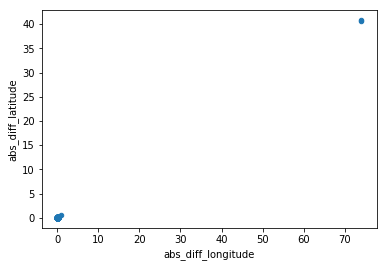

In [45]:
plot2000 = train_df.iloc[:2000].plot.scatter('abs_diff_longitude', 'abs_diff_latitude')

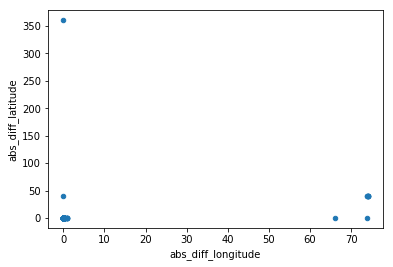

In [46]:
plot10k = train_df.iloc[2000:10000].plot.scatter('abs_diff_longitude', 'abs_diff_latitude')

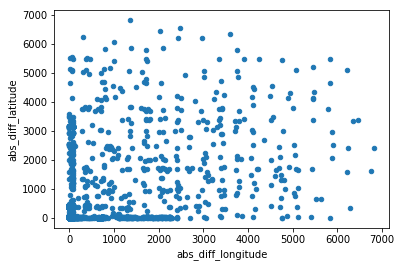

In [47]:
plot = train_df.plot.scatter('abs_diff_longitude', 'abs_diff_latitude')

# EDA

In [52]:
train_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude
0,2009-06-15 17:26:21.0000001,4.50,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041
1,2010-01-05 16:52:16.0000002,16.90,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701
2,2011-08-18 00:35:00.00000049,5.70,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708
3,2012-04-21 04:30:42.0000001,7.70,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949
4,2010-03-09 07:51:00.000000135,5.30,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754
5,2011-01-06 09:50:45.0000002,12.10,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1,0.028072,0.026603
6,2012-11-20 20:35:00.0000001,7.50,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1,0.006200,0.013180
7,2012-01-04 17:22:00.00000081,16.50,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1,0.038795,0.023090
8,2012-12-03 13:10:00.000000125,9.00,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1,0.013384,0.004915
9,2009-09-02 01:11:00.00000083,8.90,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2,0.010882,0.024265


In [49]:
# Construct and return an Nx3 input matrix for our linear model
# using the travel vector, plus a 1.0 for a constant bias term.
def get_input_matrix(df):
    return np.column_stack((df.abs_diff_longitude, df.abs_diff_latitude, np.ones(len(df))))

train_X = get_input_matrix(train_df)
train_y = np.array(train_df['fare_amount'])

print(train_X.shape)
print(train_y.shape)

(55423480, 3)
(55423480,)


In [50]:
train_X

array([[0.002701, 0.009041, 1.      ],
       [0.03678 , 0.070701, 1.      ],
       [0.008504, 0.010708, 1.      ],
       ...,
       [0.009968, 0.045017, 1.      ],
       [0.110296, 0.009334, 1.      ],
       [0.001163, 0.014355, 1.      ]])

In [17]:
# The lstsq function returns several things, and we only care about the actual weight vector w.
(w, _, _, _) = np.linalg.lstsq(train_X, train_y, rcond = None)
print(w)

[ 9.41731858e-03 -4.39205183e-05  1.13431258e+01]


$w = (X^T \cdot X)^{-1} \cdot X^T \cdot y$

In [18]:
w_OLS = np.matmul(np.matmul(np.linalg.inv(np.matmul(train_X.T, train_X)), train_X.T), train_y)
print(w_OLS)

[9.14423776e-03 4.63805262e-04 1.13431261e+01]


In [20]:
test_df = pd.read_csv("test.csv")
test_df.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [21]:
test_df.shape

(9914, 7)

In [23]:
# Reuse the above helper functions to add our features and generate the input matrix.
add_travel_vector_features(test_df)
test_X = get_input_matrix(test_df)
# Predict fare_amount on the test set using our model (w) trained on the training set.
test_y_predictions = np.matmul(test_X, w).round(decimals = 2)

# Write the predictions to a CSV file which we can submit to the competition.
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': test_y_predictions},
    columns = ['key', 'fare_amount'])
#submission.to_csv('submission.csv', index = False)

#print(os.listdir('.'))

In [24]:
submission

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.34
1,2015-01-27 13:08:24.0000003,11.34
2,2011-10-08 11:53:44.0000002,11.34
3,2012-12-01 21:12:12.0000002,11.34
4,2012-12-01 21:12:12.0000003,11.34
5,2012-12-01 21:12:12.0000005,11.34
6,2011-10-06 12:10:20.0000001,11.34
7,2011-10-06 12:10:20.0000003,11.35
8,2011-10-06 12:10:20.0000002,11.34
9,2014-02-18 15:22:20.0000002,11.34


In [36]:
dir()

['In',
 'Out',
 '__builtins__',
 '_dh',
 '_i',
 '_i36',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'get_ipython',
 'quit']

In [35]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
dir()